<a href="https://colab.research.google.com/github/sreekar2003/Email-Spam-Detection-Using-Machine-Learning-Algorithms/blob/main/Email_Spam_Detection_Using_Machine_Learning_Algorithms_updated_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install nltk
! pip install keras
! pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=63d53a9c84f743f5813deffeab35d66ce0661b2165b650da70f84312130b3820
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [ ]:
!pip install -q wordcloud 
import wordcloud 
import nltk 
nltk.download('stopwords') 
nltk.download('wordnet') 
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# Importing the warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


In [ ]:
#Loading the dataset
df = pd.read_csv("messages.csv",encoding='latin-1')

In [ ]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [ ]:
#Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [ ]:
#Checking the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2893, 3)


In [ ]:
#Checking for the null values
df.isnull().values.any()

True

In [ ]:
#Checkin for the null values in columns
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [ ]:
# replace null values with empty strings
df["message"] = df["message"].replace(np.nan, "", regex=True)

# remove messages with empty strings
df = df[df["message"].str.strip().astype(bool)]

# update csv file
df.to_csv("messages_cleaned.csv", index=False)


In [ ]:
# 62 row are missing in the subject columns that means 62 emails are without subject heading.
# Here, not dropping Nan rows for subject column as it of no use in building model.

In [ ]:
#Checking total number of mails
print("Count of label:\n",df['label'].value_counts())

Count of label:
 0    2412
1     481
Name: label, dtype: int64


In [ ]:
# Note:- Here in our dataset 1 stands for Spam mail and 0 stands for not a spam mail.
#Checking the Ratio of labels
print("Not a Spam Email Ratio i.e. 0 label:",round(len(df[df['label']==0])/len(df['label']),2)*100,"%")
print("Spam Email Ratio that is 1 label:",round(len(df[df['label']==1])/len(df['label']),2)*100,"%")

Not a Spam Email Ratio i.e. 0 label: 83.0 %
Spam Email Ratio that is 1 label: 17.0 %


In [ ]:
# so here 17 % of the data is a spam email

In [ ]:
#Creating the new column for length of message column
df['length'] = df.message.str.len()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [ ]:
#Converting all messages to lower case
df['message'] = df['message'].str.lower()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [ ]:
# regular expressions
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [ ]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [ ]:
# now re-checking the data
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [ ]:
#Removing the stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [ ]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,2179
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1454
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [ ]:
#Total length removal
print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 9344743
Cleaned Length: 6767857
Total Words Removed: 2576886


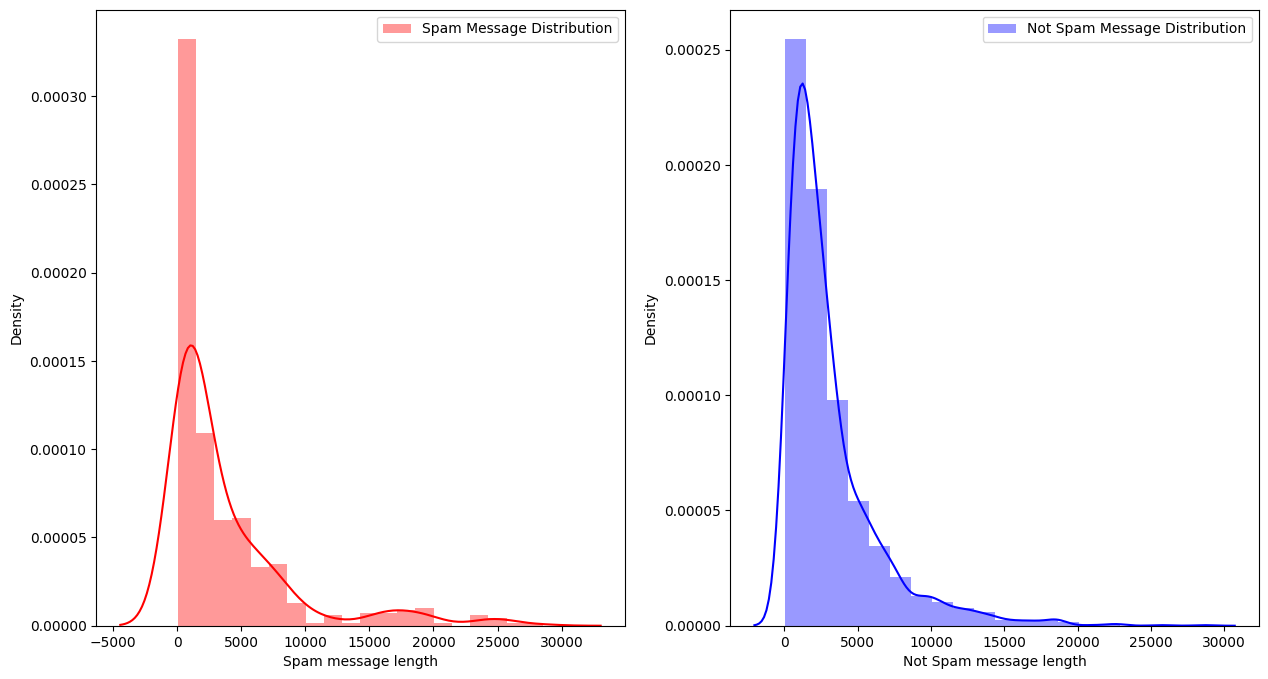

In [ ]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='b')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()

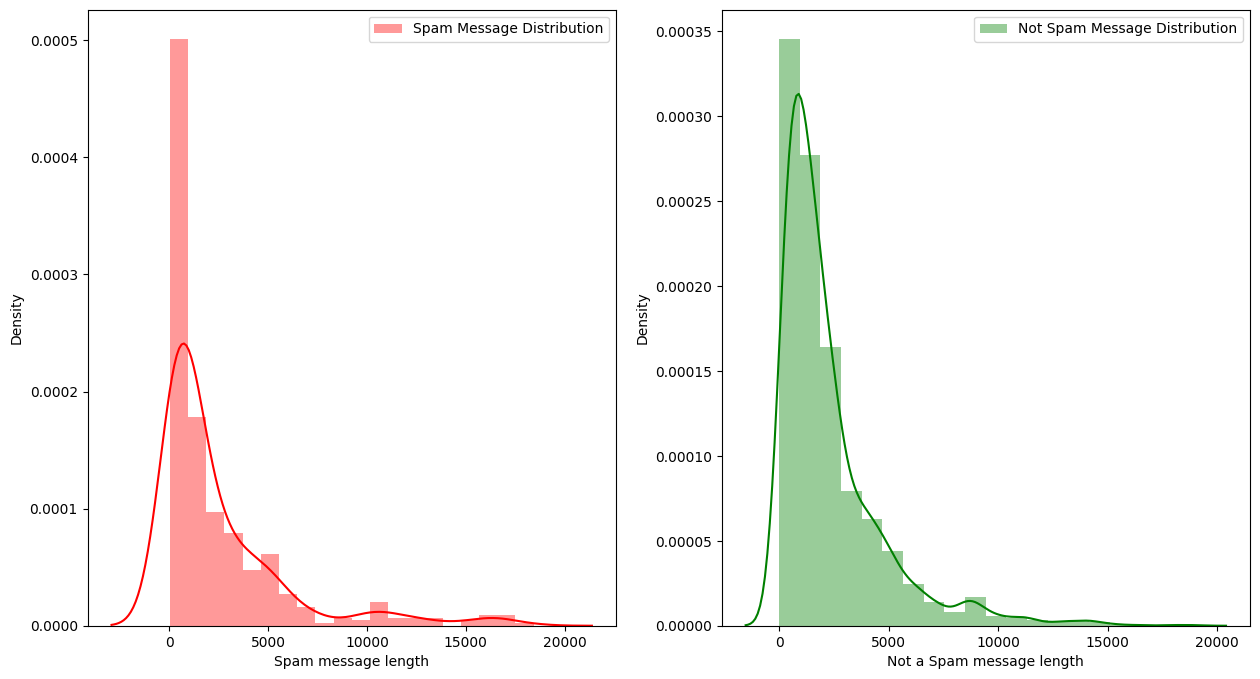

In [ ]:
#Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='g')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()

plt.show()

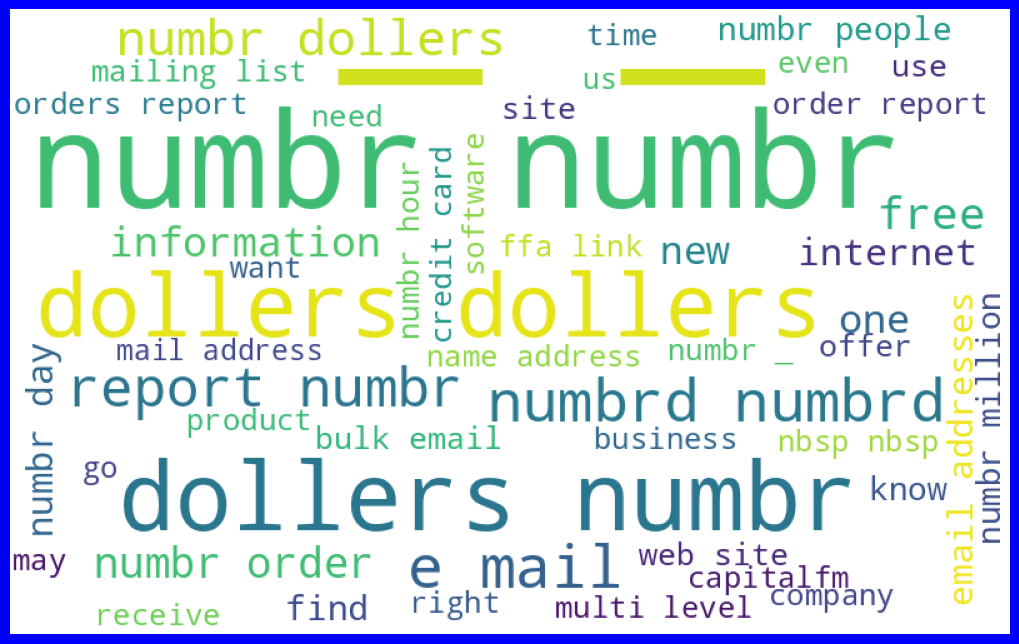

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

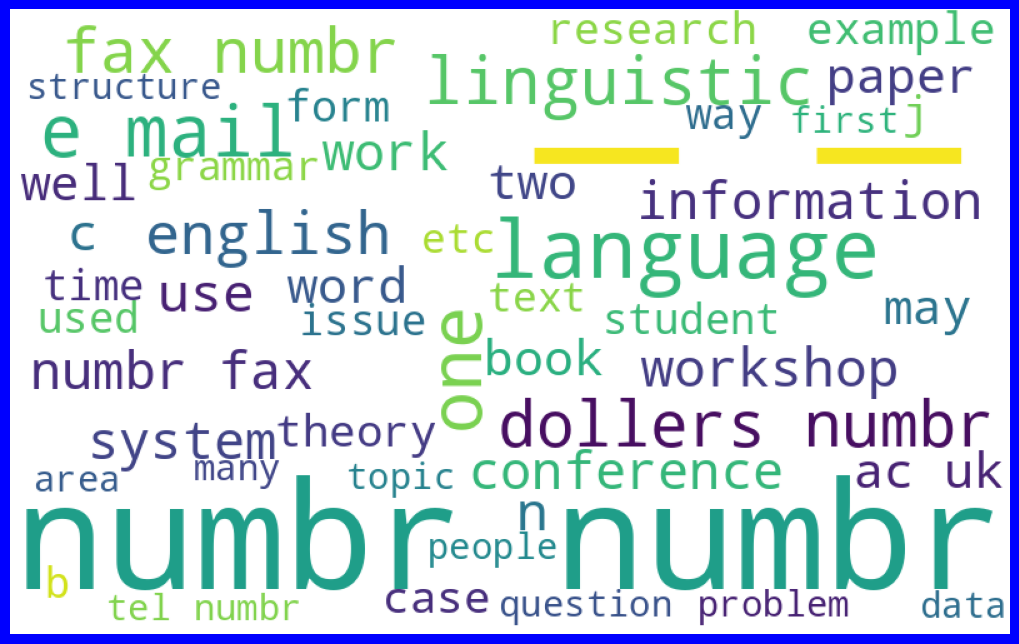

In [ ]:
#Getting sense of loud words in not-spam 
from wordcloud import WordCloud

not_spams = df['message'][df['label']==0]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(not_spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Converting the text into vectors using TF-IDF, as text cannot be the input in the model
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label


tf_vec = TfidfVectorizer()

naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

decision = DecisionTreeClassifier()
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")

clf = LogisticRegression()


features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [ ]:
# Train and predict for naive bayes model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)        

#test_size=0.20 random_state=42 test_size=0.15

naive.fit(X_train,Y_train)
y_pred= naive.predict(x_test)



print ('Final score = > ', accuracy_score(y_test,y_pred))




Final score = >  0.8342541436464088


In [ ]:
# Train and predict for SVM model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)        

#test_size=0.20 random_state=42 test_size=0.15



SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))


Final score = >  0.9875690607734806


In [ ]:
# train and predict for the Decision tree model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
decision.fit(X_train,Y_train)
#test_size=0.20 random_state=42 test_size=0.15

y_pred = decision.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))



Final score = >  0.9640883977900553


In [ ]:
# train and predict uisng random forest classifier
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
classifier.fit(X_train, Y_train)  
#test_size=0.20 random_state=42 test_size=0.15
y_pred= classifier.predict(x_test)  
print ('Final score = > ', accuracy_score(y_test,y_pred))


Final score = >  0.9558011049723757


In [ ]:
# train and predict uisng logistic regression
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
clf.fit(X_train, Y_train)
#test_size=0.20 random_state=42 test_size=0.15
y_pred= clf.predict(x_test)  
print ('Final score = > ', accuracy_score(y_test,y_pred))


Final score = >  0.9475138121546961


In [ ]:
# train and predict uisng KNN
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9758203799654577


In [ ]:
# train and predict uisng Neural Network
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model and fit it to the training data
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
nn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nn.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9930915371329879


In [ ]:
# train and predict uisng Gradient Boosting Algorithm
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create gradient boosting model and fit it to the training data
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9740932642487047


In [ ]:
# train and predict uisng Gaussian Naive Bayes model
# Convert sparse matrix X to dense numpy array
X_dense = X.toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

# Create Gaussian Naive Bayes model and fit it to the training data
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb.predict(X_test)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9430051813471503


In [ ]:
# train and predict uisng CNN

# Convert sparse matrix X to dense numpy array
X_dense = X.toarray()

# Reshape X_dense for use in 1D Convolutional Neural Network
X_reshaped = np.expand_dims(X_dense, axis=2)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the testing data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Measure accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/10
73/73 [==============================] - 89s 1s/step - loss: 0.3782 - accuracy: 0.8410
Epoch 2/10
73/73 [==============================] - 84s 1s/step - loss: 0.1769 - accuracy: 0.9395
Epoch 3/10
73/73 [==============================] - 86s 1s/step - loss: 0.0697 - accuracy: 0.9909
Epoch 4/10
73/73 [==============================] - 84s 1s/step - loss: 0.0348 - accuracy: 0.9961
Epoch 5/10
73/73 [==============================] - 83s 1s/step - loss: 0.0188 - accuracy: 0.9996
Epoch 6/10
73/73 [==============================] - 91s 1s/step - loss: 0.0114 - accuracy: 0.9996
Epoch 7/10
73/73 [==============================] - 85s 1s/step - loss: 0.0074 - accuracy: 1.0000
Epoch 8/10
73/73 [==============================] - 85s 1s/step - loss: 0.0050 - accuracy: 1.0000
Epoch 9/10
73/73 [==============================] - 84s 1s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 10/10
19/19 [==============================] - 7s 337ms/step
Accuracy: 0.8013816925734024


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[Text(0.8492647058823529, 0.9827586206896551, 'x[18089] <= 0.015\ngini = 0.266\nsamples = 2169\nvalue = [1827, 342]'),
 Text(0.7612745098039215, 0.9482758620689655, 'x[41154] <= 0.009\ngini = 0.157\nsamples = 1901\nvalue = [1738, 163]'),
 Text(0.6950980392156862, 0.9137931034482759, 'x[32052] <= 0.076\ngini = 0.12\nsamples = 1853\nvalue = [1734, 119]'),
 Text(0.6411764705882353, 0.8793103448275862, 'x[8614] <= 0.053\ngini = 0.1\nsamples = 1828\nvalue = [1732, 96]'),
 Text(0.5803921568627451, 0.8448275862068966, 'x[19527] <= 0.068\ngini = 0.08\nsamples = 1804\nvalue = [1729, 75]'),
 Text(0.5372549019607843, 0.8103448275862069, 'x[23195] <= 0.019\ngini = 0.065\nsamples = 1780\nvalue = [1720, 60]'),
 Text(0.4980392156862745, 0.7758620689655172, 'x[49044] <= 0.029\ngini = 0.057\nsamples = 1771\nvalue = [1719, 52]'),
 Text(0.4666666666666667, 0.7413793103448276, 'x[51790] <= 0.083\ngini = 0.049\nsamples = 1760\nvalue = [1716, 44]'),
 Text(0.45098039215686275, 0.7068965517241379, 'x[7268] <=

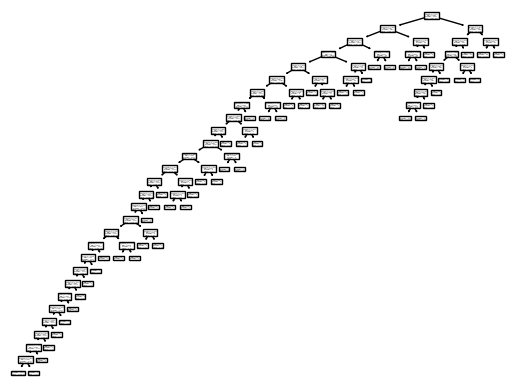

In [ ]:
tree.plot_tree(decision)

In [ ]:
# Checking Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       464
           1       0.00      0.00      0.00       115

    accuracy                           0.80       579
   macro avg       0.40      0.50      0.44       579
weighted avg       0.64      0.80      0.71       579



In [ ]:
from sklearn.metrics import confusion_matrix


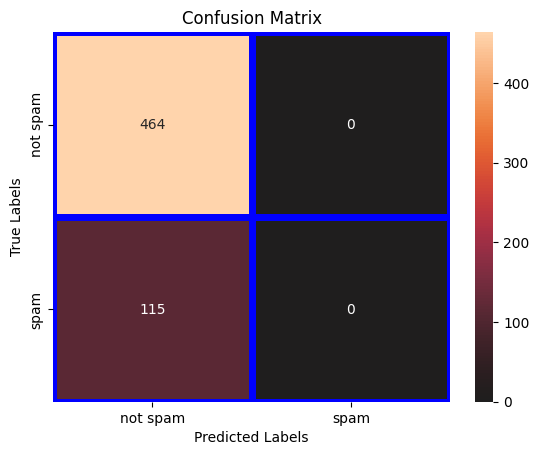

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True, ax=ax, linewidths=5, linecolor='b', center=0, fmt='g')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])

plt.show()


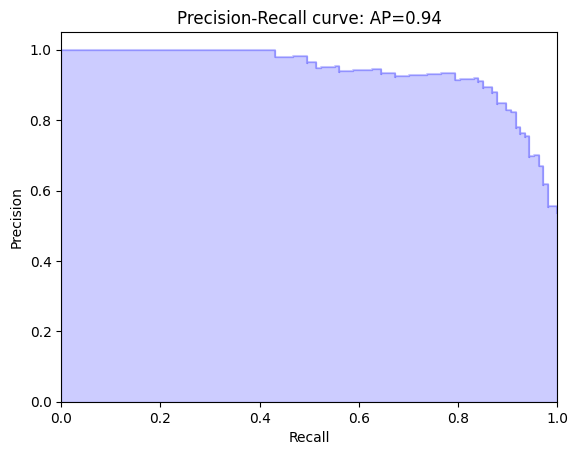

In [ ]:


# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Use the model to make predictions on the testing set
y_pred = model.predict_proba(X_test)[:, 1]
y_true = y_test


#pr curve 

# Assume y_true and y_pred are the true labels and predicted probabilities, respectively
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
average_precision = average_precision_score(y_true, y_pred)

# Plot the PR curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

# Add labels and a legend to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

# load the data
data = pd.read_csv("/content/messages.csv", encoding="latin-1")

# preprocess the text data
vectorizer = CountVectorizer(stop_words=nltk.corpus.stopwords.words("english"), lowercase=True)
X_train_vec = vectorizer.fit_transform(data["message"])
y_train = data["label"]

# train a SVM classifier
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train_vec, y_train)

# take input from user
subject = input("Enter subject: ")
message = input("Enter message: ")
input_text = subject + " " + message

# preprocess input text
input_vec = vectorizer.transform([input_text])

# predict whether input is spam or ham
if svm_clf.predict(input_vec) == 0:
    print("This is a ham message")
else:
    print("This is a spam message")


Enter subject: the ultimate free xxx experience ! !
Enter message: this is a multi-part message in mime format . - - part0 _ 895794301 _ boundary content - id : content - type : text / plain ; charset = us-ascii - - part0 _ 895794301 _ boundary content - id : content - type : message / rfc822 content - transfer-encoding : 7bit content - disposition : inline from : mad kevin return - path : to : madkevin @ aol . com subject : the ultimate free xxx experience ! ! date : thu , 21 may 1998 19 : 38 : 18 edt organization : aol ( http : / / www . aol . com ) mime - version : 1 . 0 content - type : text / plain ; charset = us-ascii content - transfer-encoding : 7bit click here now ! ! ! - - part0 _ 895794301 _ boundary - -
This is a spam message


End of the program